---
WBT-MBT2-25E <i>Programming Python for Bioinformatics</i> &copy; 2021 Adrian Kania (adrian15x.kania@uj.edu.pl) Department of Computational Biophysics and Bioinformatics, Faculty of Biochemistry, Biophysics and Biotechnology, Jagiellonian University

---

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">Mini project: Sequences comparison using an alignment and free-alignment methods </p>

We will consider neuraminidase (N) sequences from the avian influenza viruses. This project aims to compare the effectiveness of alignment and free-alignment approaches for sequences comparison. The letter N and H refers to neuraminidase and hemagglutinin type respectively.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">1. Neuraminidase sequences </p>

Download sequences and IDs from $influenza\_viruses$ FASTA file and save them into two lists. Convert nucleotides to upper case. 

In [1]:
import re

In [2]:
IDS = []
sequences = []
start_pattern = '>.*'

with open('influenza_viruses', 'r') as f:
    for line in f:
        line = line.rstrip()
        if re.match(start_pattern, line):
            IDS.append(line)
        else:
             sequences.append(line.upper())

To perform steps 2,3 and 4 I recommend creating three separate scripts named: step2.py, step3.py and step4.py in which you append all necessary functions and variables.  <br>

- step2.py should contain: DNA dictionary (points for matches and mismatches), SequenceAlign, Profile, ProfileAlign, and the main functions: ProfileMultipleAlignment, Score, SimMatrix
- step3.py should contain: MerDict, CompareSequences, MerMatrix
- step4.py should contain: WordSeq, LZcomplexity, LZMatrix

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">2. Multiple Sequence Alignment (MSA)  </p>

In [5]:
import step2
print(dir(step2))

['DNA_2', 'Profile', 'ProfileAlign', 'ProfileMultipleAlignment', 'Score', 'SequenceAlign', 'SimMatrix', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [6]:
from step2 import DNA_2, SequenceAlign, Profile, ProfileAlign, ProfileMultipleAlignment, Score, SimMatrix

Use ProfileMultipleAlignment function to perform the MSA. Put the following points:
- match (2), mismatch (-2) (DNA_2 dictionary)
- gap insertion/gap extension (4)

Save it to an $align$ variable. 

Use SimMatrix to compare aligned sequences.

Build a UPGMA tree and plot it. Make a comment on it. Whether viruses are classified appropriately?

In [9]:
align = ProfileMultipleAlignment(sequences, insert=4, extend=4)

In [11]:
SimMatrix(align)

array([[   0.,  924.,  944., ..., 5868., 5868., 5828.],
       [ 924.,    0.,  116., ..., 5868., 5868., 5828.],
       [ 944.,  116.,    0., ..., 5868., 5868., 5828.],
       ...,
       [5868., 5868., 5868., ...,    0.,  468.,  772.],
       [5868., 5868., 5868., ...,  468.,    0.,  768.],
       [5828., 5828., 5828., ...,  772.,  768.,    0.]])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #to generate a tree
from scipy.spatial.distance import pdist  #to prepare an approprite format

X = pdist(SimMatrix(align)) 
dist = linkage(X, method="average")  #average = UPGMA method


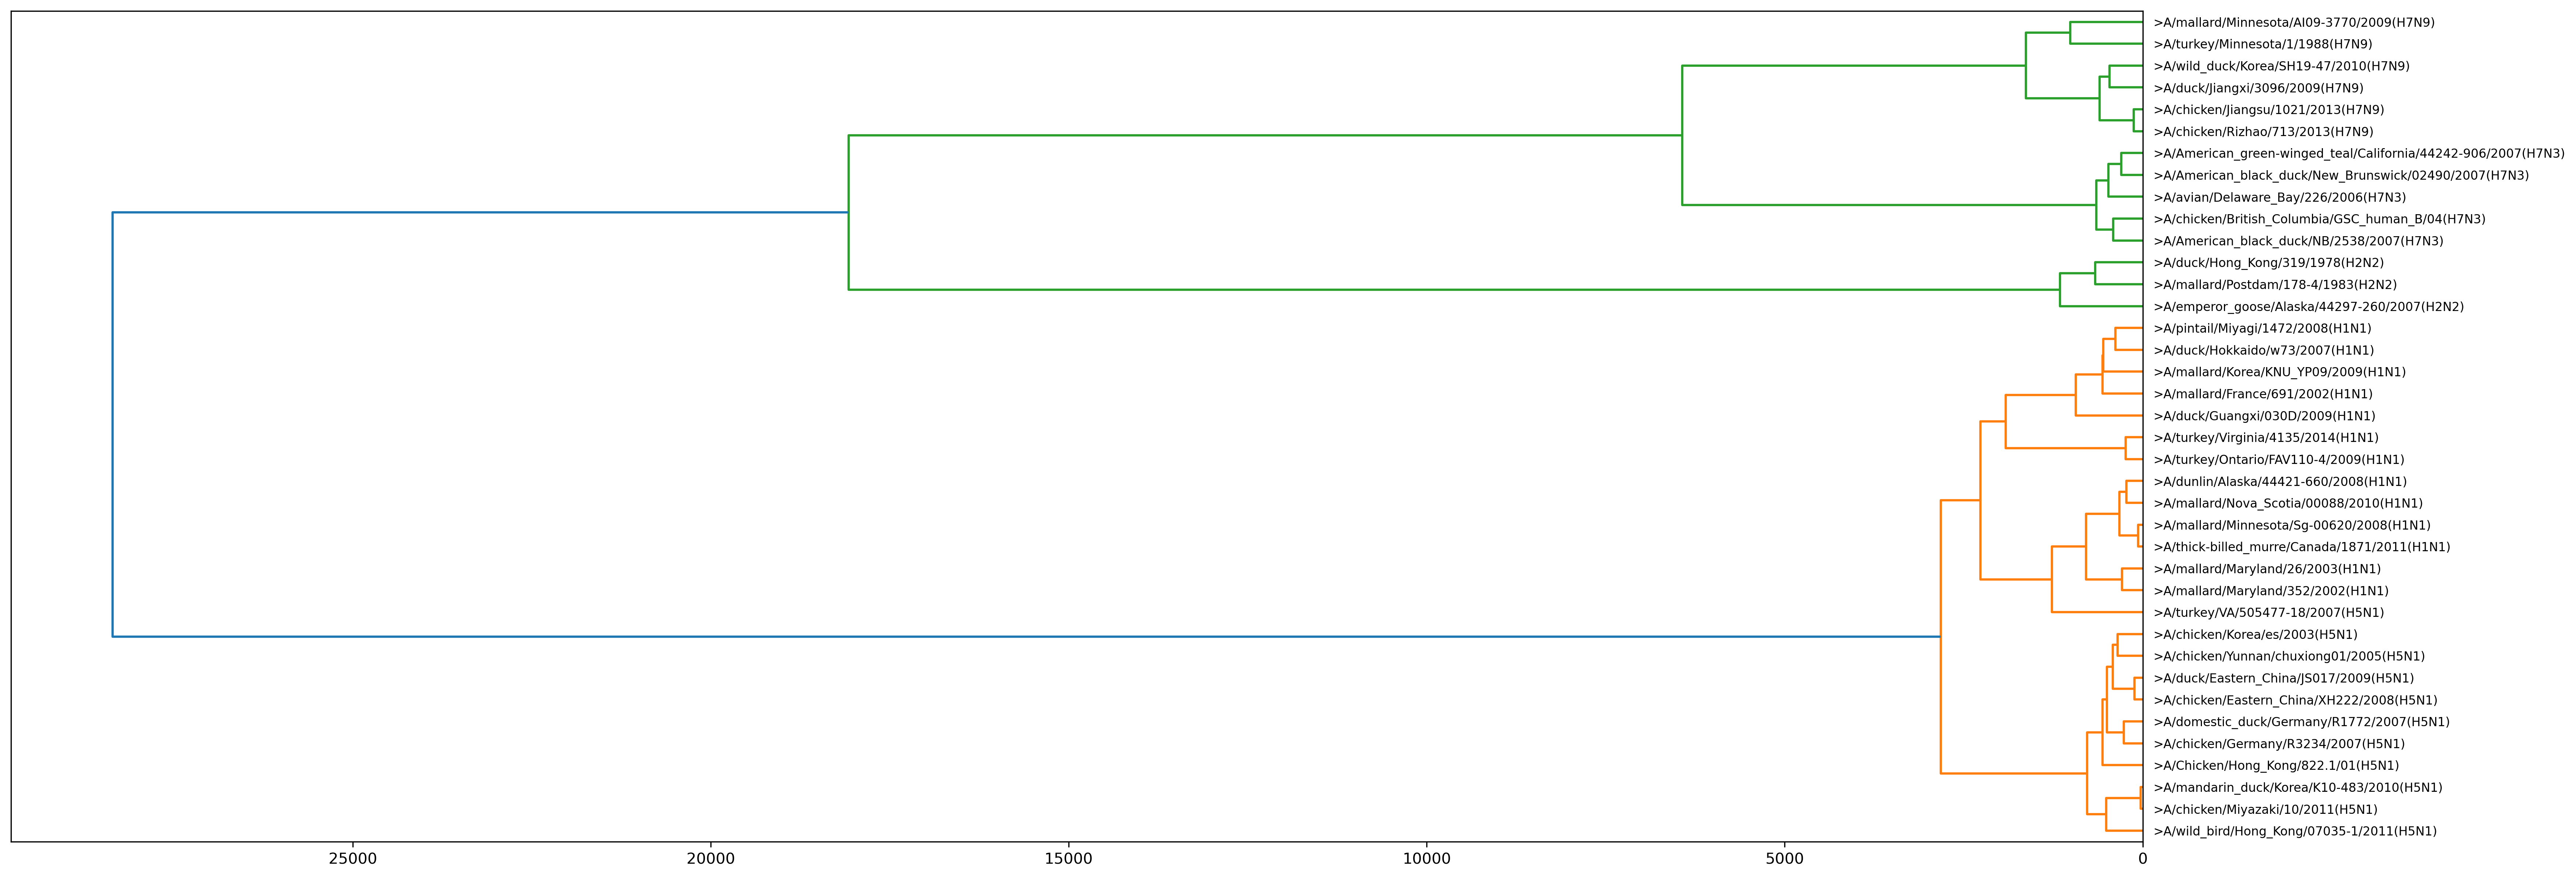

In [32]:
fig = plt.figure(figsize=(25, 10), dpi=300)
dn = dendrogram(dist, labels = IDS, orientation = "left")
plt.show()

The classification seems to be made well. Strains are grouped as monophyletic groups except for the H1N1 strain - here we have a paraphyletic group, as one of the H5N1 virus was grouped with the H1N1 branch.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">3. K-mers </p>

In [3]:
import step3
print(dir(step3))

['CompareSequences', 'DNA_2', 'MerDict', 'MerMatrix', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [4]:
from step3 import MerDict, CompareSequences, MerMatrix

Use MerMatrix function (with k=3) to compare viruses sequences and use this matrix to construct a phylogenetic tree (UPGMA method). Plot a tree and make a comment on it.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">4. Lempel-Ziv Complexity </p>

In [8]:
import step4
print(dir(step4))

['DNA_2', 'LZMatrix', 'LZcomplexity', 'WordSeq', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [9]:
from step4 import WordSeq, LZcomplexity, LZMatrix

Use LZMatrix function to compare viruses sequences and use this matrix to construct a phylogenetic tree (UPGMA method). Plot a tree and make a comment on it.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">5. Time consumption </p>

Run code from steps 2, 3 and 4 once again but this time measure the time needed to perform calculations. Which method is the fastest, which the slowest?

In [8]:
#To measure the execution time you may use time library and calculate the difference between the time before and after part of your code. Below an example:

import time
start_time = time.time()

#############Your code here##########
x = [1,2]
N = 150000
for i in range(N):
    x.append(x[-1]+x[-2])
#####################################

end_time = time.time()
seconds = end_time - start_time
print(seconds)

0.7230541706085205


<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">6. H5N1 viruses and 20 aa deletion </p>

It appears that many H5N1 subtype viruses posses a characterisitc 60 nt (20 aa) deletion which causes
higher virulence of these viruses. Download neuraminidase protein sequences for A/mandarin_duck/Korea/K10-483/2010(H5N1) [ID: JF699677.1] and A/duck/Hokkaido/w73/2007(H1N1) [ID: AB470663.1] from Nucleotide database finding an appropriate tag (via Python/eutils). Plot a dot matrix and localise this deletion. 

In [6]:
from Bio import Entrez
from Bio import SeqIO
ID = ['AEA02263', 'BAG85128']
seqs = []
for elem in ID:
    handle = Entrez.efetch(db="protein", id=elem, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    seqs.append(record.seq)
print(seqs)
print(seqs[1])
print(seqs[0])

C:\Users\Acer\miniconda3\lib\site-packages\Bio\Entrez\__init__.py:658: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  warnings.warn(


[Seq('MNPNQKIITIGSVCMIIGIVSLMLQIGNMISIWVSHSIQTGNQHQAEPIRNTNF...IDK'), Seq('MNPNQKIITIGSICMVIGIASLMLQIGNIISIWISHSIQTGNQYQPEPCNQSII...IDK')]
MNPNQKIITIGSICMVIGIASLMLQIGNIISIWISHSIQTGNQYQPEPCNQSIITYENNTWVNQTYVNISNTNFLAEQAVTSVTLAGNSSLCPISGWAIYSKDNGIRIGSKGDVFVIREPFISCSHLECRTFFLTQGALLNDKHSNGTVKDRSPYRTLMSCPVGEAPSPYNSRFESVAWSASACHDGISWLTIGISGPDNGAVAVLKYNGIITDTIKSWRNNILRTQESECACVNGSCFTVMTDGPSNGQASYKIFKIEKGKVVKSVELNAPNHHYEECSCYPDTGEIMCVCRDNWHGSNRPWVSFNQNLEYQIGYICSGVFGDNPRPNDGTGSCGPMSSNGAYGVKGFSFKYGNGVWIGRTKSTSSRSGFEMIWDPNGWTETDSSFSVKQDIVAITDWSGYSGSFVQHPELTGLDCMRPCFWVELIRGRPKENTIWTSGSSISFCGVNSDTVGWSWPDGAELPFTIDK
MNPNQKIITIGSVCMIIGIVSLMLQIGNMISIWVSHSIQTGNQHQAEPIRNTNFLTENAVASVTLAGNSSLCPIRGWAVHSKDNSIRIGSKGDVFVIREPFISCSHMECRTFFLTQGALLNDKHSNGTVKDRSPHRTLMSCPVGEAPSPYNSRFESVAWSASACHDGTSWLTIGVSGPDDGAVAVLKYKGIITDTIKSWGNNILRTQESECACVNGSCFTVMTDGPSNGQASYKIFKIEKGKVVKSVELNAPNYHYEECSCYPDSGEIICVCRDNWHGSNRPWVSFNQNLEYQIGYICSGVFGDNPRPNDGTGSCGPMSPNGAYGIKGFSFKYGNGVWIGRTKSTNSRSGFEMIWDPNGWTGTDSEFSVKQDIVAITDWSGYSGSFVQHPE

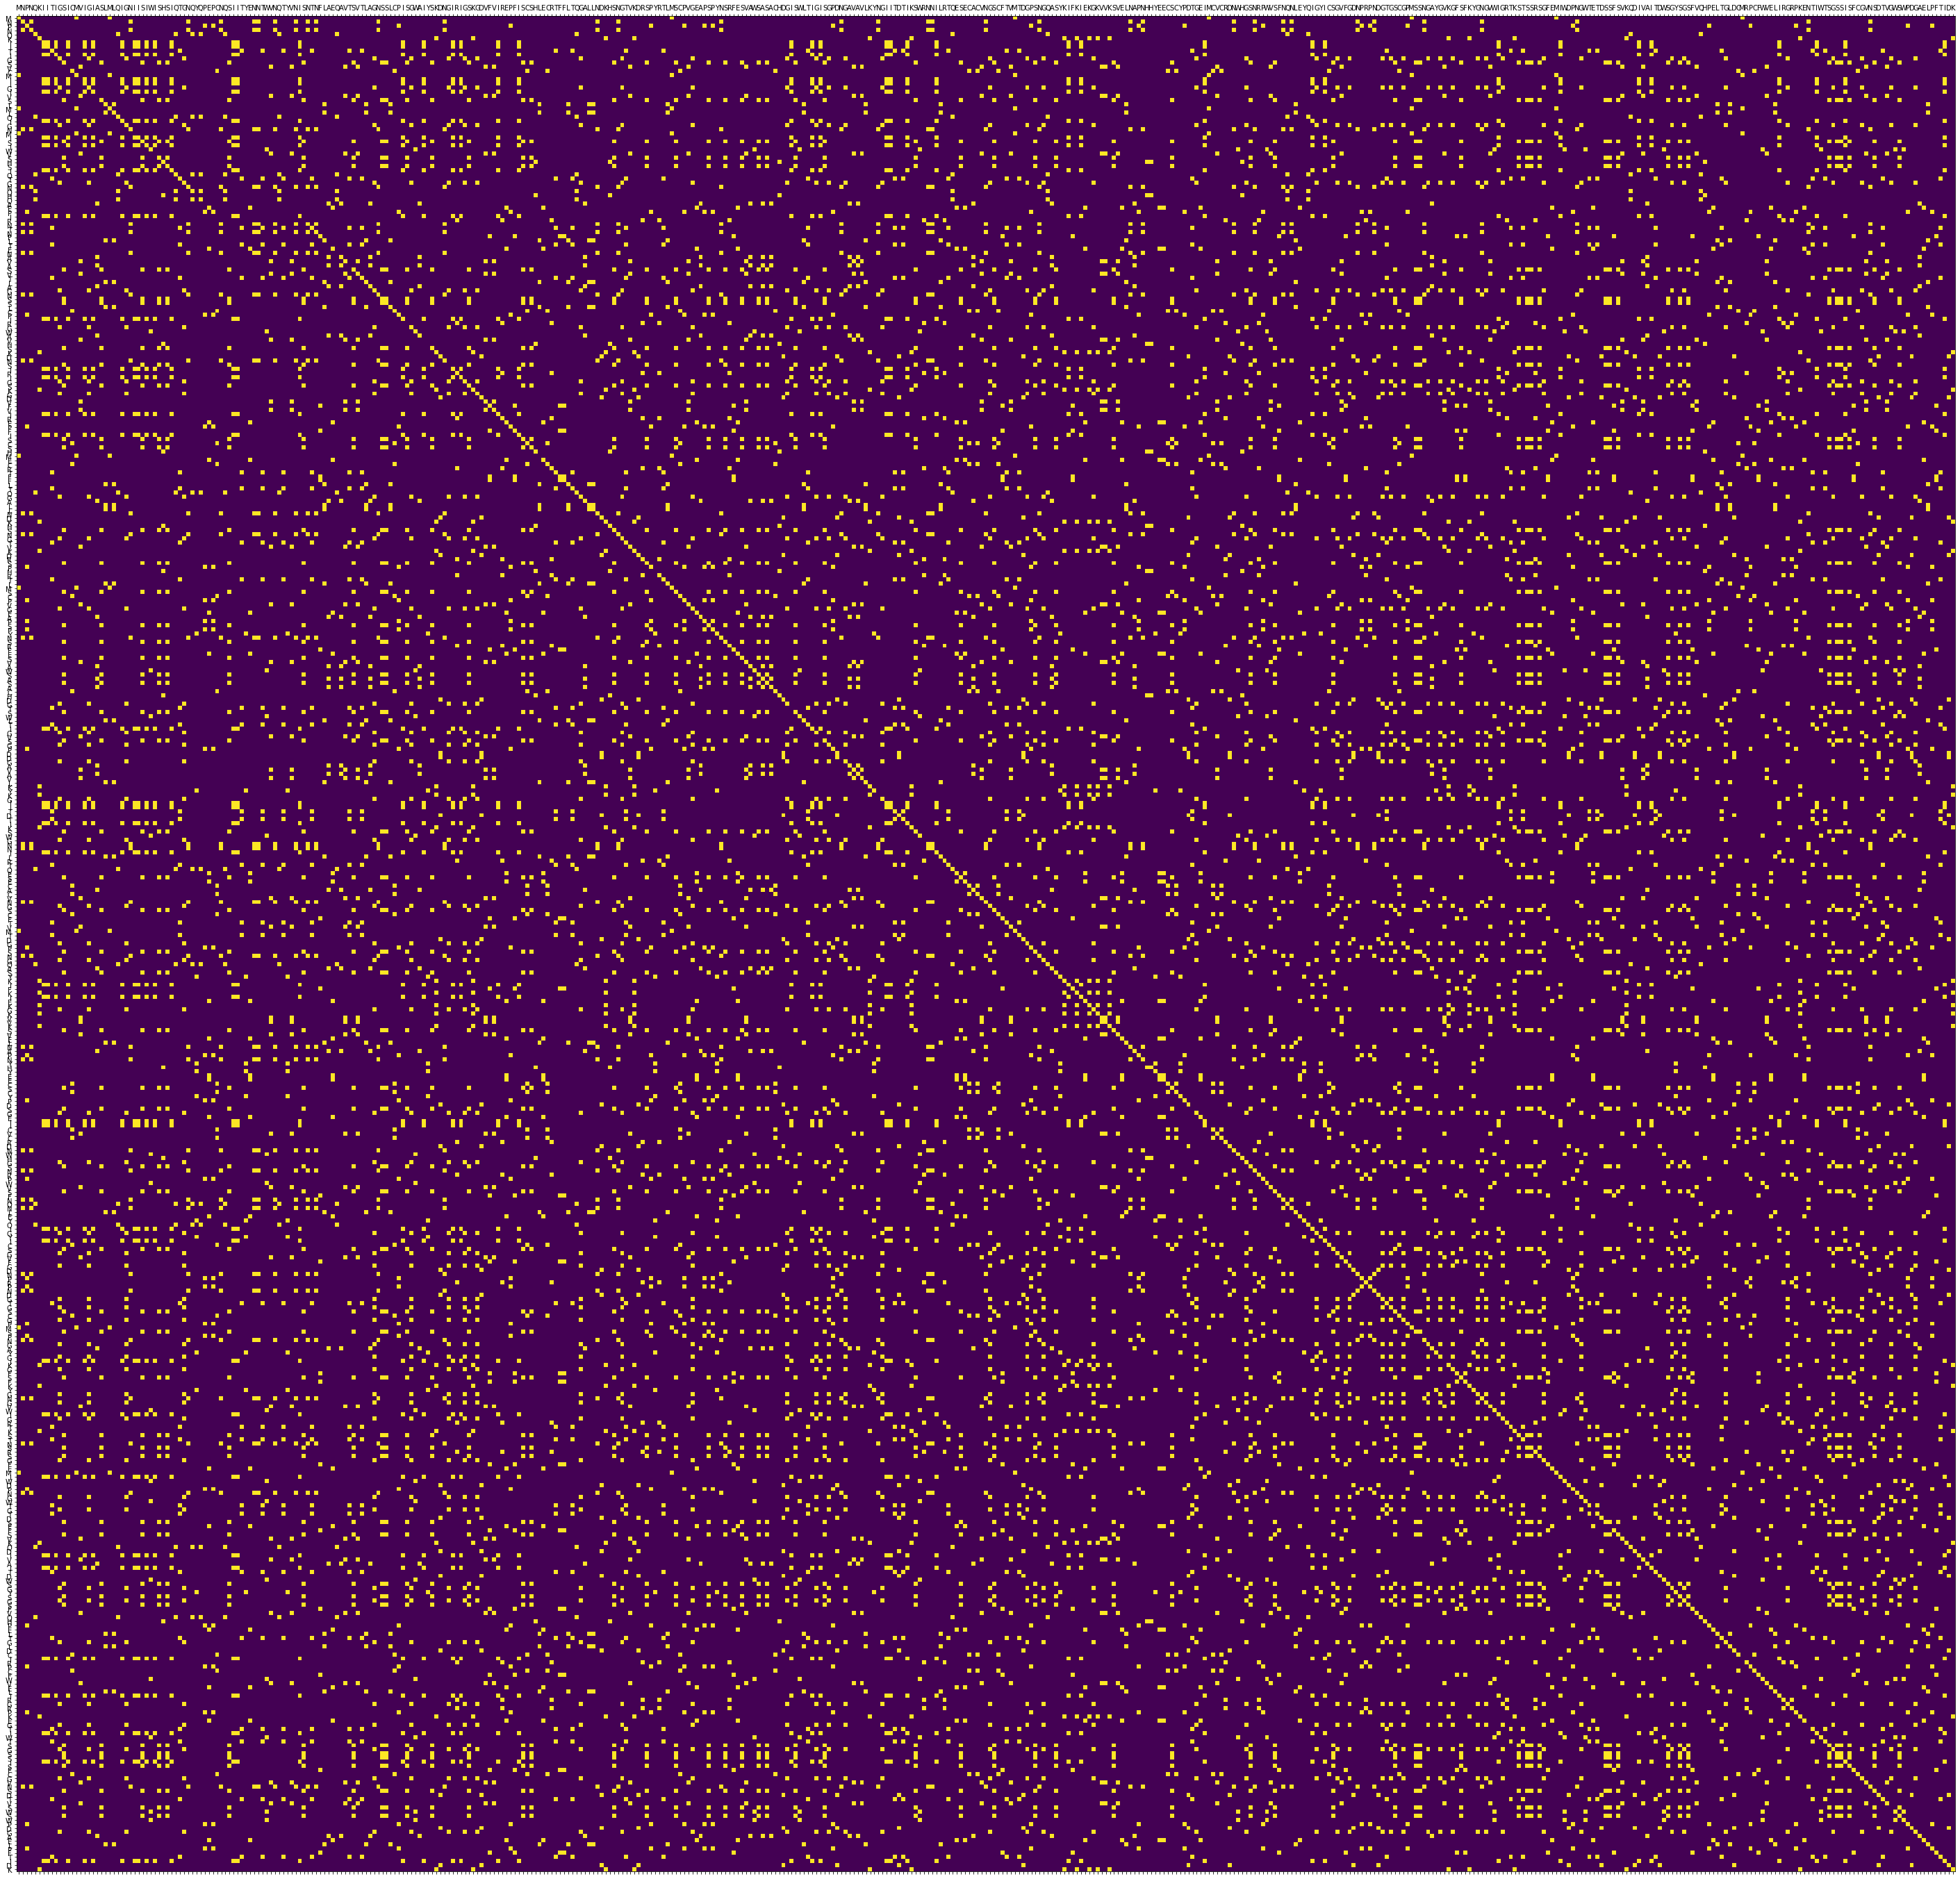

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def dotMatrix(sequence1, sequence2):
    
    S1 = len(sequence1)
    S2 = len(sequence2)

    A = np.zeros((S1, S2))

    for i in range(S1):
        for j in range(S2):
            if sequence1[i] == sequence2[j]:  #if sequences have the same residue at i and j poistions respectively
                A[i,j] = 1

    fig = plt.figure(figsize=(50,50))
    ax = fig.add_subplot(111)
    cax = ax.matshow(A)
    xaxis = np.arange(S2)
    yaxis = np.arange(S1)
    ax.set_xticks(xaxis)
    ax.set_yticks(yaxis)
    ax.set_xticklabels(sequence2)
    ax.set_yticklabels(sequence1)

    plt.show()
    
dotMatrix(seqs[0],seqs[1])


As we can see from the plot the deletion of 20 amino acids occured at the begining of the sequence of neuraminidase protein from BAG85128.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">7. Neuraminidase inhibitors </p>

There are many drugs classified as neuraminidase inhibitors (NAIs) and one of them is zanamivir. Download the zanamivir SMILES structure from the Pubchem database and plot it.

In [1]:
from urllib.request import urlopen
from lxml import etree

molecule = "zanamivir"
query = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{molecule}/XML"

response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)


In [2]:
nam = []
for element in tree.iter():
    if element.tag == "{http://www.ncbi.nlm.nih.gov}PC-InfoData_value_sval": 
        nam.append(element.text)

In [3]:
print(nam[5:])

['(2R,3R,4S)-3-acetamido-4-guanidino-2-[(1R,2R)-1,2,3-trihydroxypropyl]-3,4-dihydro-2H-pyran-6-carboxylic acid', 'InChI=1S/C12H20N4O7/c1-4(18)15-8-5(16-12(13)14)2-7(11(21)22)23-10(8)9(20)6(19)3-17/h2,5-6,8-10,17,19-20H,3H2,1H3,(H,15,18)(H,21,22)(H4,13,14,16)/t5-,6+,8+,9+,10+/m0/s1', 'ARAIBEBZBOPLMB-UFGQHTETSA-N', '332.13319899', 'C12H20N4O7', '332.31', 'CC(=O)NC1C(C=C(OC1C(C(CO)O)O)C(=O)O)N=C(N)N', 'CC(=O)N[C@@H]1[C@H](C=C(O[C@H]1[C@@H]([C@@H](CO)O)O)C(=O)O)N=C(N)N', '332.13319899']


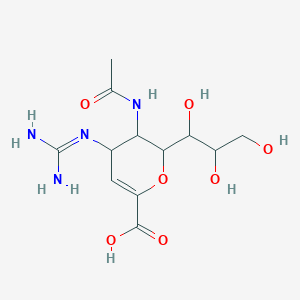

In [4]:
from urllib.request import urlretrieve
from IPython.display import Image


smiles = nam[-3]
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
plot = Image(filename='smi_pic.png')
plot